.[mport Libraries, Functions and Data](#1)<br>
.[Data Cleaning](#2)<br>
.[Data Exploration](#3)<br>
.[asking questions and replaying to it](#4)


.<a id=1><h1 align='center'><font color='#2B547E'> Import Libraries, Functions and Data</font> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
import plotly.graph_objects as go
import plotly.express as px# Data visualization
from IPython.display import display
import os

In [2]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.
# pd.set_option('display.max_colwidth', -1) # will help to show all the text strings in the column.

In [3]:
data=pd.read_csv("movie.csv",lineterminator='\n')

In [4]:
data.iloc[[*range(5)],[*range(0,3),*range(-3,0)]]

Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview Original_Language  \
0  Peter Parker is unmasked and no longer able to...                en   
1  In his second year of fighting crime, Batman u...                en   
2  Stranded at a rest stop in the mountains durin...                en   
3  The tale of an extraordinary family, the Madri...                en   
4  As a collection of history's worst tyrants and...                en   

                                Genre  \
0  Action, Adventure, Science Fiction   
1            Crime, Mystery, Thriller   
2                            Thriller   
3  Animation, Comedy, Family, Fantasy   
4    Action, Adventure, Thriller, War   

                                          Poster_Url  
0  https://image.tmdb.org/t/p/original/1g0dhYtq4i...  
1  https://image.tmdb.org/t/p/original/74xTEgt7R3...  
2  https://image.tmdb.org/t/p/original/vDHsLnOWKl...  
3  https://image.tmdb.org/t/p/original/4j0PNHkMr5...  
4  https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...

In [5]:
data.shape

(9827, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
data.groupby(["Title"])["Popularity"].max().sort_values(ascending=False)[:5]

Title
Spider-Man: No Way Home    5083.95
The Batman                 3827.66
No Exit                    2618.09
Encanto                    2402.20
The King's Man             1895.51
Name: Popularity, dtype: float64

.<a id=2><h1 align='center'><font color='#2B547E'> Data cleaning</font> 

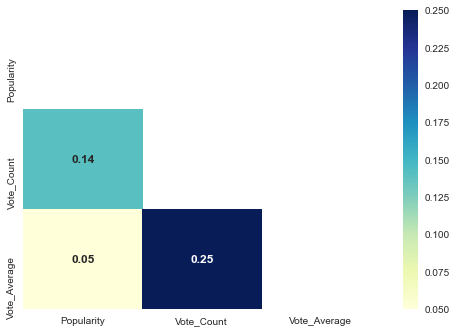

In [8]:
x = data.corr()
y = np.round(x,2);
# Can be great to plot only a half matrix  
# Generate a mask for the upper triangle
mask = np.zeros_like(x)
mask[np.triu_indices_from(mask)] = True 
plt.show(sns.heatmap(y,annot = True,cmap="YlGnBu",mask=mask,annot_kws={"fontsize":12, "weight":'bold'}).set_facecolor('white'));

<strong><font color='#2B547E'>changing the data types</font></strong>

In [9]:
#changing the object to date_time
data["Release_Date"]=pd.to_datetime(data["Release_Date"])
data["release_year"]=pd.to_datetime(data["Release_Date"]).dt.year
data["release_year"]=data["release_year"].astype("category")

In [10]:
#changing all object type into catogry type
x=data.select_dtypes(include=[object])
for i in x.columns:
    data=data.astype({i:'category'},errors='raise')

In [11]:
#checking for missing values
np.round(data.isnull().sum()*100.00/len(data),2)

Release_Date         0.0
Title                0.0
Overview             0.0
Popularity           0.0
Vote_Count           0.0
Vote_Average         0.0
Original_Language    0.0
Genre                0.0
Poster_Url           0.0
release_year         0.0
dtype: float64

>as we see we donn have any missing values in our dataset 

<strong><font color='blue'>dropping the useless column</font></strong>

In [12]:
data.drop(["Poster_Url"],axis=1,inplace=True)

<strong><font color='blue'>checking for outlairs</font></strong>

In [13]:
numeric_data=data.select_dtypes(exclude=["category"])

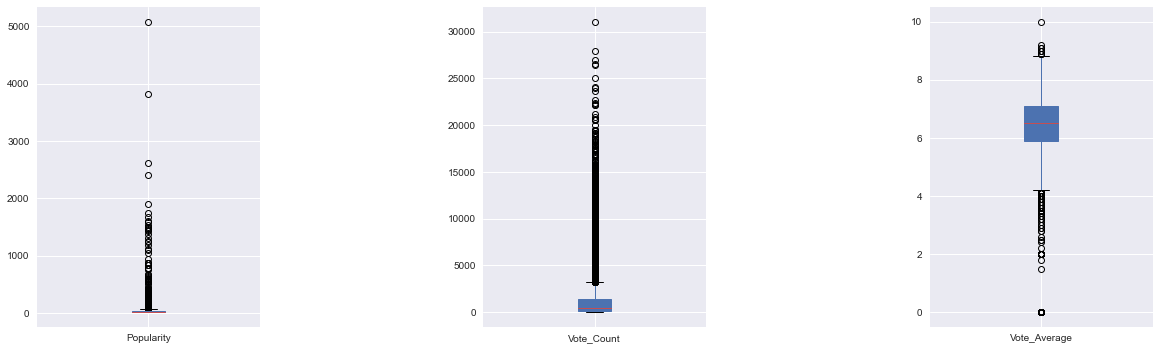

In [14]:
numeric_data.plot(subplots =True, kind = 'box', layout = (3,3), figsize = (20,20),patch_artist=True)
plt.subplots_adjust(wspace = 1)

In [15]:
def out_lairs(col):
    """
    this function take the name of column and compute the median(Q2)represent 50% percentage
    and also compute the Q3(75%)from the boxblot then compute the inter_quantile_range 
    and then we compute the upper limit and the lowerlimit to show the origin of the outlairs
    
    """
    Q1 = data[col].quantile(0.25)
    Q3 =  data[col].quantile(0.75)
    IQR = Q3-Q1
    data_out = data.loc[(data[col] < (Q1-1.5*IQR)) | (data[col] > (Q3+1.5*IQR))]
    
    return data_out 

In [16]:
def imputing_outlairs(col):
    """"
  this fun take the col and impute the values that more than 95 with median values bc its not sensative to outlairs  
    """
    x=data[col].quantile(0.50)
    y=data[col].quantile(0.99)
    data[col] = np.where(data[col] >y, x, data[col])

In [17]:
out_lairs("Popularity")

Release_Date                                              Title  \
0      2021-12-15                            Spider-Man: No Way Home   
1      2022-03-01                                         The Batman   
2      2022-02-25                                            No Exit   
3      2021-11-24                                            Encanto   
4      2021-12-22                                     The King's Man   
5      2022-01-07                                       The Commando   
6      2022-01-12                                             Scream   
7      2022-02-10                                               Kimi   
8      2022-02-17                               Fistful of Vengeance   
9      2021-11-03                                           Eternals   
10     2022-02-18                                            Pursuit   
11     2021-08-06            My Hero Academia: World Heroes' Mission   
12     2022-02-25                                           Restless   
13     2021-12-02                                    Nightmare Alley   
14     2022-01-28                The Ice Age Adventures of Buck Wild   
15     2022-02-25                  Hotel Transylvania: Transformania   
16     2022-02-18                            Texas Chainsaw Massacre   
17     2022-01-28                                         The Requin   
18     2022-02-04                                       Looop Lapeta   
19     2021-11-04                                         Red Notice   
20     2021-12-01                                             Sing 2   
21     2022-01-03                     The Jack in the Box: Awakening   
22     2021-09-30                        Venom: Let There Be Carnage   
23     2021-12-16                           The Matrix Resurrections   
24     2021-11-24             Resident Evil: Welcome to Raccoon City   
25     2021-10-19                                      Last Man Down   
26     2022-01-07                                     American Siege   
27     2022-02-10                                          Uncharted   
28     2020-10-16  Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...   
29     2021-11-11                            Ghostbusters: Afterlife   
30     2022-01-05                                            The 355   
31     2021-09-01          Shang-Chi and the Legend of the Ten Rings   
32     2022-02-09                                           Marry Me   
33     2022-01-21                                        The Hunting   
34     2021-12-08                                    West Side Story   
35     2022-02-04                                  Through My Window   
36     2021-07-02             The Seven Deadly Sins: Cursed by Light   
37     2021-11-05                                           One Shot   
38     2022-01-24                          Tom and Jerry: Cowboy Up!   
39     2020-10-15                                   Chernobyl: Abyss   
40     2022-02-25                                   Desperate Riders   
41     2021-11-10                           Clifford the Big Red Dog   
42     2022-02-25                   Tyler Perry's A Madea Homecoming   
43     2021-07-01                     The Boss Baby: Family Business   
44     2022-03-10                                        Turning Red   
45     2022-01-13                                             Brazen   
46     2022-01-14                                          The House   
47     2022-02-10                                         Blacklight   
48     2021-10-15                                   Ron's Gone Wrong   
49     2021-08-11                                           Free Guy   
50     2021-05-26                                            Cruella   
51     2021-07-28                                  The Suicide Squad   
52     2021-11-12                       The Simpsons in Plusaversary   
53     2022-01-17                          Forgive Us Our Trespasses   
54     2021-06-17                            

>after seeing the origin of outlairs based on other columns like Vote_Average and also title that these outlairs values not wrong cuz some fims has a big popularity along the years like the series of spider man with a proof that many series were made of it and its popularity has increased along the years on the other hand there are some films have least popularity 

In [18]:
out_lairs("Vote_Count")

Release_Date                                              Title  \
0      2021-12-15                            Spider-Man: No Way Home   
3      2021-11-24                                            Encanto   
9      2021-11-03                                           Eternals   
22     2021-09-30                        Venom: Let There Be Carnage   
31     2021-09-01          Shang-Chi and the Legend of the Ten Rings   
49     2021-08-11                                           Free Guy   
50     2021-05-26                                            Cruella   
51     2021-07-28                                  The Suicide Squad   
54     2021-06-17                                               Luca   
55     2021-04-07                                      Mortal Kombat   
56     2021-03-18                       Zack Snyder's Justice League   
59     2021-09-15                                               Dune   
66     2021-09-29                                     No Time to Die   
71     2018-04-25                             Avengers: Infinity War   
72     1989-06-23                                             Batman   
73     2021-07-07                                        Black Widow   
75     2021-05-19                                                 F9   
88     2021-07-28                                      Jungle Cruise   
89     2021-03-24                                  Godzilla vs. Kong   
90     2012-06-23                             The Amazing Spider-Man   
92     2009-12-10                                             Avatar   
99     2021-07-02                                   The Tomorrow War   
102    2021-03-03                           Raya and the Last Dragon   
104    2021-04-22                                       Wrath of Man   
108    2021-05-25             The Conjuring: The Devil Made Me Do It   
109    2005-06-10                                      Batman Begins   
131    2020-12-16                                  Wonder Woman 1984   
132    2014-04-16                           The Amazing Spider-Man 2   
135    2016-10-07                                      Hacksaw Ridge   
137    2001-11-16           Harry Potter and the Philosopher's Stone   
138    2012-04-25                                       The Avengers   
141    2016-10-25                                     Doctor Strange   
144    2019-06-28                          Spider-Man: Far From Home   
146    2020-09-02                                  After We Collided   
150    2009-03-19                                            Knowing   
152    2014-09-10                                    The Maze Runner   
159    2002-11-13            Harry Potter and the Chamber of Secrets   
160    2020-02-12                                 Sonic the Hedgehog   
161    2017-10-27                                               Coco   
163    2014-10-15                                               Fury   
168    2017-07-05                             Spider-Man: Homecoming   
170    2002-05-01                                         Spider-Man   
171    2019-04-24                                  Avengers: Endgame   
173    2011-09-28                                         Real Steel   
175    2019-04-11                                              After   
179    2007-12-12                                        I Am Legend   
184    2005-11-16                Harry Potter and the Goblet of Fire   
191    2018-12-06                  Spider-Man: Into the Spider-Verse   
192    2004-05-31           Harry Potter and the Prisoner of Azkaban   
195    2016-02-09                                           Deadpool   
197    2001-11-01                                     Monsters, Inc.   
199    2021-12-07                                      Don't Look Up   
200    2017-06-15                                             Cars 3   
201    2007-05-01                                       Spider-Man 3   
204    2010-04-28                            

>as we see that the films that have high popularity have also high viwers and this make asense for me that the more popularity you have will attract the more people to watch the film 

In [19]:
imputing_outlairs("Vote_Count")

In [20]:
out_lairs("Vote_Average")

Release_Date                                              Title  \
77     2022-02-04                             Sex, Shame and Tears 2   
80     2022-03-30                               Sonic the Hedgehog 2   
210    2023-04-06                                  Fast & Furious 10   
229    2021-12-25                                         El Paseo 6   
231    2022-04-22                      Dragon Ball Super: Super Hero   
232    2022-08-25                                   After Ever Happy   
243    1986-01-18                     Beautiful Sisters: Flesh Slave   
308    2021-10-27               Nobody Sleeps in the Woods Tonight 2   
314    2022-03-17                                       The Bad Guys   
322    2022-05-04        Doctor Strange in the Multiverse of Madness   
329    2021-07-06                                    Why Women Cheat   
355    2021-11-12                               The Belly of the Sea   
356    2020-11-27             Grisaia: Phantom Trigger The Animation   
402    2022-06-08                            Jurassic World Dominion   
411    2022-03-30                                            Morbius   
412    2022-02-09                                     ¡Qué Despadre!   
414    2023-06-23                                          The Flash   
457    2022-04-07        Fantastic Beasts: The Secrets of Dumbledore   
510    2021-02-03                                Please Enlighten Me   
525    2019-07-29                                          Aquaslash   
604    2021-10-23                                 A Forbidden Orange   
667    2019-03-29      Demon Slayer: Kimetsu no Yaiba Sibling's Bond   
741    2021-04-16                                  August Never Ends   
831    2022-03-24                                      The Lost City   
917    2022-10-07     Spider-Man: Across the Spider-Verse (Part One)   
984    2009-01-01                                          Uncharted   
1061   2022-12-14                                           Avatar 2   
1148   2021-09-22                                     We Are Nothing   
1158   2023-03-17                       Aquaman and The Lost Kingdom   
1213   2022-03-16                                          Ambulance   
1295   2009-03-12                               Dragonball Evolution   
1296   2021-10-15                     Sharkdog’s Fintastic Halloween   
1512   2022-06-16                           Minions: The Rise of Gru   
1566   2009-09-12                                        Hole in One   
1570   2022-04-13                      Ladybug & Cat Noir: Awakening   
1577   2011-11-03              In the Name of the King 2: Two Worlds   
1757   2023-06-07                   Transformers: Rise of the Beasts   
1758   2022-05-25                                  Top Gun: Maverick   
2034   2014-04-04                                  Bermuda Tentacles   
2083   2022-03-18                                         Deep Water   
2223   2008-01-24                                  Meet the Spartans   
2239   2013-12-12                 Odnoklassniki.ru: The Magic Laptop   
2263   2021-08-25                 Kimetsu no Yaiba Orchestra Concert   
2288   2022-07-07                             Thor: Love and Thunder   
2325   2021-06-17                                  Impossible Things   
2383   2022-07-14                                       Bullet Train   
2385   2009-06-12                                      Seven Minutes   
2391   2020-10-14              The Three Deaths of Marisela Escobedo   
2435   2013-11-01                                           Euphoria   
2436   2014-08-12                           TEKKEN: Kazuya's Revenge   
2453   2022-03-31                                       The Northman   
2586   2022-07-27                            DC League of Super-Pets   
2593   2021-04-21                                      Don't Kill Me   
2706   2017-11-24                                        Singularity   
2732   2023-05-03                     Guardia

>as we see that some films have low popularity,votecount,voteaverage that makes sense that cuz there are some films got low rate and make the people get depressed(we notice that the fims will be shown in <strong><font color='blue'>2022and2023</font></strong> hasn'tshown yet and its make a sense that it not have a vote may be this  dateset was collected in in at the beginning of<strong><font color='blue'>2022</font></strong> 

In [21]:
#so am gonna delete it bc it will not be useful for me it not make asense to make a recommendation to films hven't shown yet
data=data[data["Vote_Average"]!=0.0]
imputing_outlairs("Vote_Average")


In [40]:
most_popularity=data.groupby(["Title"])["Vote_Average"].max().sort_values(ascending=False)[:5]
most_popularity

Title
Demon Slayer -Kimetsu no Yaiba- The Movie: Mugen Train                 8.4
KonoSuba: God's Blessing on this Wonderful World! Legend of Crimson    8.4
The Great Dictator                                                     8.4
Harakiri                                                               8.4
Ikiru                                                                  8.4
Name: Vote_Average, dtype: float64

.<a id=3><h1 align='center'><font color='#2B547E'> Data Exploration</font> 

<strong><font color='#2B547E'>which film has the most popularity films?</font></strong>

<AxesSubplot:xlabel='Title'>

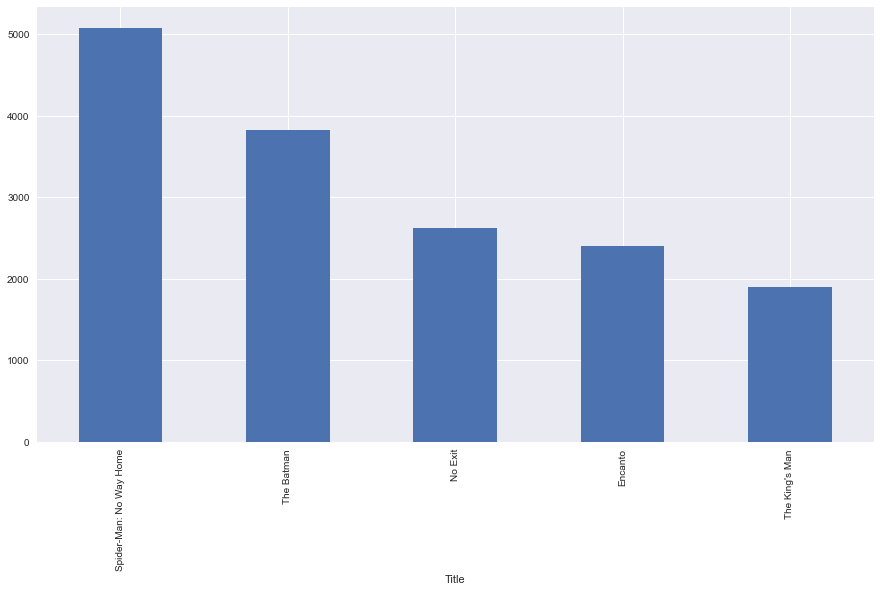

In [23]:
most_popularity=data.groupby(["Title"])["Popularity"].max().sort_values(ascending=False)[:5]
most_popularity.plot.bar(figsize=(15,8))

<strong><font color='#2B547E'>which film has the highest rate ?</font></strong>

<AxesSubplot:xlabel='Title'>

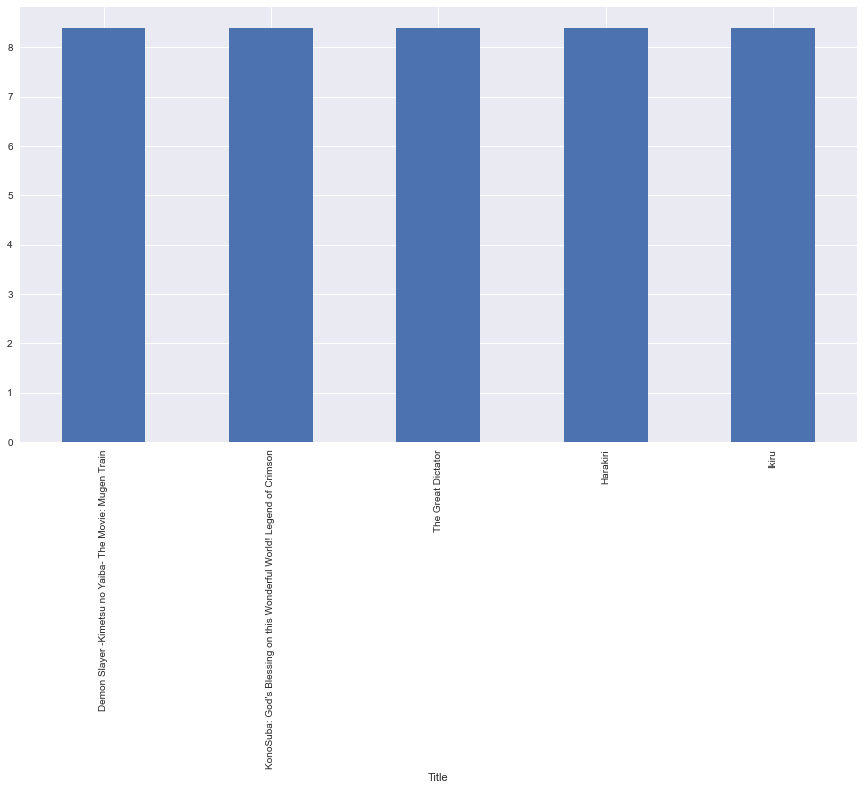

In [24]:
most_popularity=data.groupby(["Title"])["Vote_Average"].max().sort_values(ascending=False)[:5]
most_popularity.plot.bar(figsize=(15,8))

<strong><font color='#2B547E'>which year has the most release films?</font></strong>

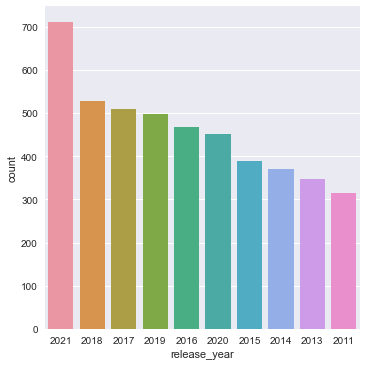

In [25]:
sns.catplot(data=data,x="release_year",order=data["release_year"].value_counts().index[:10],kind="count")

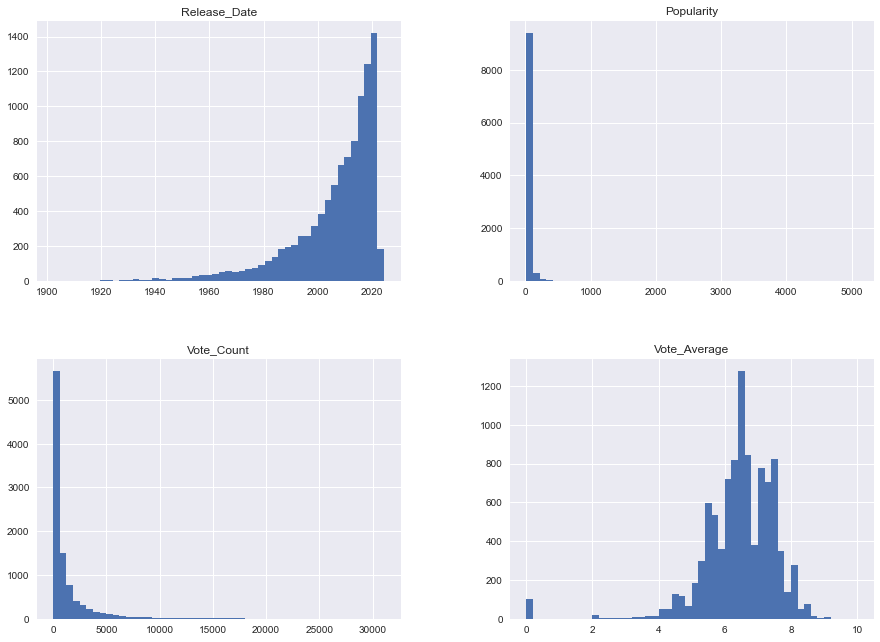

In [26]:
numeric_data.hist(bins = 50,figsize = (15,11));

>as we see from the histogram that


<strong><font color='#2B547E'>released_year</font></strong>that the highst rate of exorted filmse<strong><font color='#2B547E'>1980to2020</font></strong>

<strong><font color='#2B547E'>vote_count</font></strong>that the highst rate 90% of vote_count doesnt exceed 5000

<strong><font color='#2B547E'>Popularity</font></strong>more than 90% less than 1000


<strong><font color='#2B547E'>vote_average</font></strong>the 95% from the rates lay from 4 to 8

<strong><font color='#2B547E'>which language has the most rate in  production?</font></strong>

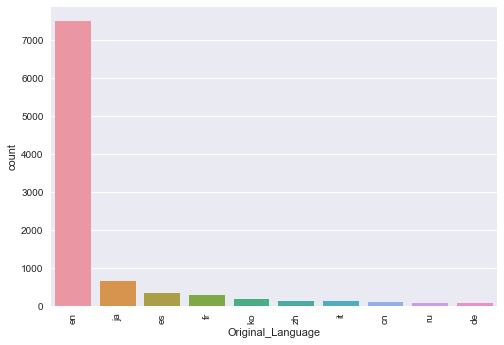

In [27]:
sns.countplot(data=data, x='Original_Language', order=data['Original_Language'].value_counts().index[:10])
plt.xticks(rotation=90);

>as we see that the most movies language is english

In [28]:
data.head()

Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...     5083.95      8940.0   
1  In his second year of fighting crime, Batman u...     3827.66      1151.0   
2  Stranded at a rest stop in the mountains durin...     2618.09       122.0   
3  The tale of an extraordinary family, the Madri...     2402.20      5076.0   
4  As a collection of history's worst tyrants and...     1895.51      1793.0   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3                en                            Thriller   
3           7.7                en  Animation, Comedy, Family, Fantasy   
4           7.0                en    Action, Adventure, Thriller, War   

  release_year  
0         2021  
1         2022  
2         2022  
3         2021  
4         2021

<strong><font color='#2B547E'>which kind of movies have the highest rate of production?</font></strong>

In [29]:
filter_kind = data.set_index('Title').Genre.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filter_kind

Title
Spider-Man: No Way Home                                                                                              Action
Spider-Man: No Way Home                                                                                           Adventure
Spider-Man: No Way Home                                                                                     Science Fiction
The Batman                                                                                                            Crime
The Batman                                                                                                          Mystery
The Batman                                                                                                         Thriller
No Exit                                                                                                            Thriller
Encanto                                                                                                           Animation
En

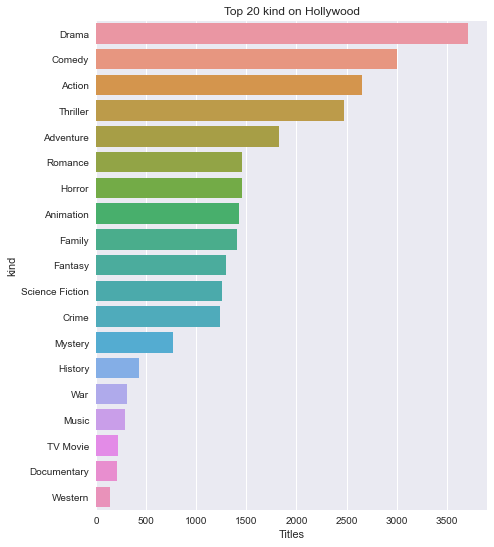

In [30]:
plt.figure(figsize=(7,9))
g = sns.countplot(y = filter_kind, order=filter_kind.value_counts().index[:20])
plt.title('Top 20 kind on Hollywood')
plt.xlabel('Titles')
plt.ylabel('kind')
plt.show()

> Hollywood recognizes the following genres of film:
 Action, Adventure, Comedy, Crime and Gangster, Drama, Epics and Historical, Horror, Musicals, Science fiction, War and   Westerns

Now, even though most recently, Hollywood has begun dabbling mostly in Science Fiction and Action Crime, the trends of which genre predominates, changes every decade.

In [31]:
data2 = data[['Genre','release_year']]
Science_Fiction_year = data2[data2['Genre']=='Science Fiction'].release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})
drama_year = data2[data2['Genre']=='Drama'].release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})
comedy_year = data2[data2['Genre']=='Comedy'].release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})
action_year = data2[data2['Genre']=='Action'].release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})


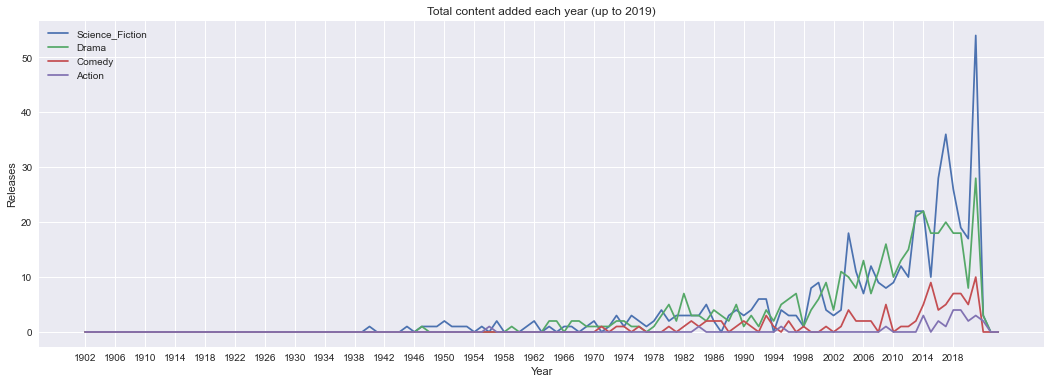

In [32]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(data=drama_year, x='year', y='count')
sns.lineplot(data=comedy_year, x='year', y='count')
sns.lineplot(data=action_year, x='year', y='count')
sns.lineplot(data=Science_Fiction_year, x='year', y='count')
ax.set_xticks(np.arange(1902, 2020, 4))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Science_Fiction','Drama','Comedy','Action'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

>In the early 1950s, the highest grossing films were generally comedies. The trend changed as the 1980s progressed, and precedence was slowly given to action films and science fiction.
The early 1990s, saw the emergence of romance films on the top-grossers list. 1995 onwards, the film-scape began to be dominated by science fiction and adventure.
Since then, the winning genre in Hollywood has always been science fiction. Action and Romantic Comedies contest for second. Lately, animation is also becoming a giant.
This is in terms of popularity.
In terms of critic accolades, period dramas and war stories have always ruled.

In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [34]:
data["release_month"]=pd.to_datetime(data["Release_Date"]).dt.month
data_month = pd.DataFrame(data.release_month.value_counts()).reset_index().rename(columns={'index':'month','release_month':'count'})
# converting month number to month name
data_month['month_final'] = data_month['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
data_month

month  count month_final
0      10   1020         Oct
1       9    992         Sep
2      12    925         Dec
3       8    882         Aug
4       3    810         Mar
5       7    794        July
6       2    786         Feb
7      11    785         Nov
8       6    760        June
9       4    665         Apr
10      5    659         May
11      1    649         Jan

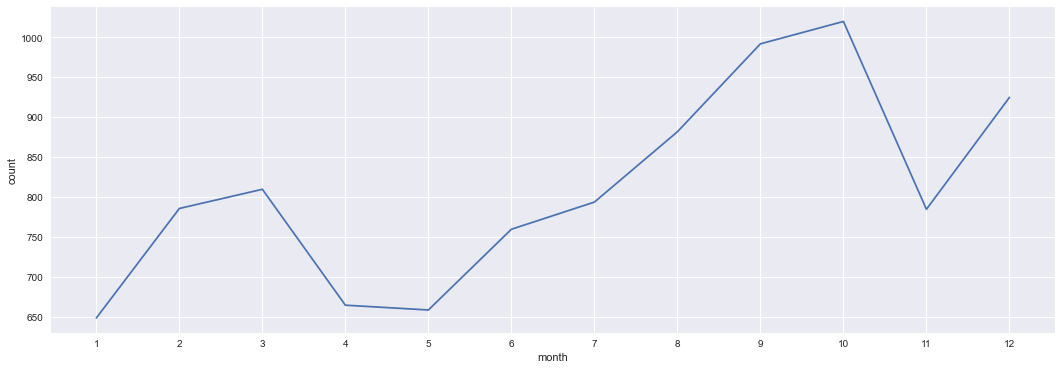

In [35]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(data=data_month, x='month', y='count')
ax.set_xticks(np.arange(1,13, 1));

>Ending and starting of the year December and January is the best month to release content. The best 4 months to release content are October,  November, December, and cebtember

In [36]:
data['genre_rate'] = data['Genre'].apply(lambda x: x.split(",")[0]) 


<AxesSubplot:xlabel='release_year'>

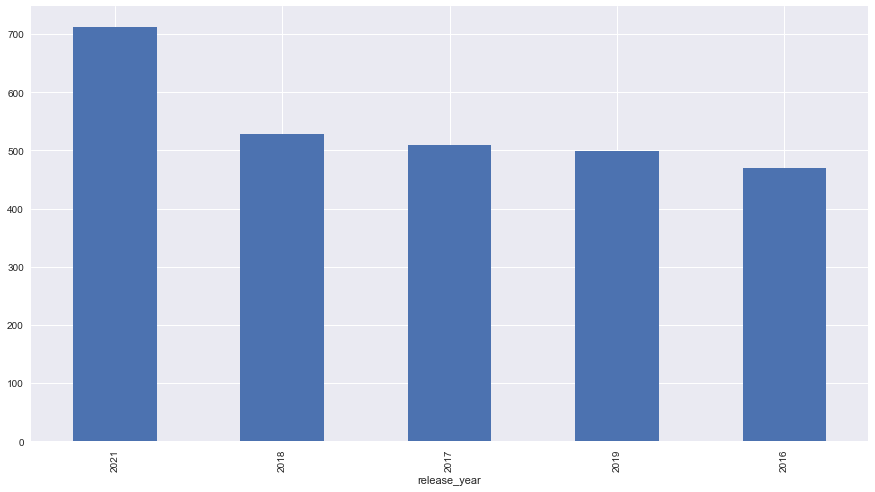

In [37]:
df=data.groupby(["release_year"])["Title"].count().sort_values(ascending=False)[:5]
df.plot.bar(figsize=(15,8))

>as we see that 2021 has the highest rate of producing films

In [38]:
#so we are gonna impute with the median bc its not sensative to outlairs
imputing_outlairs("Popularity")